In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score 
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Store the data in a dataframe
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
#Print head
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Get the number of rows and columns
df.shape

(1470, 35)

In [5]:
#Get the column datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
#Count the missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#Check for null values
df.isnull().values.any()

False

In [8]:
#View statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
#count the number of employees that left or stayed
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

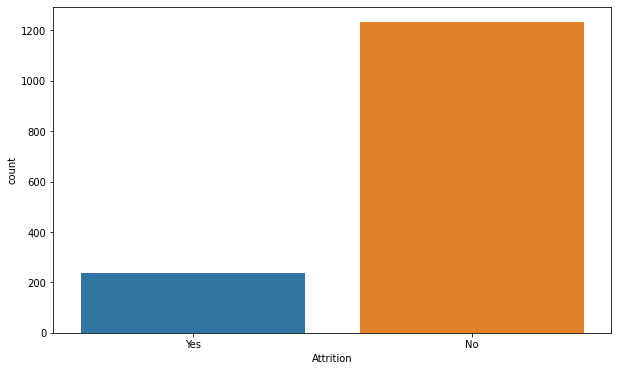

In [10]:
#Visualize the above number
plt.figure(figsize=(10, 6))
sns.countplot(df['Attrition'])

In [11]:
#If the model guessed no all the times whats the possibility to be correct
#The model has to beat this number
no_guessing = round((1233 - 237) / 1233, 3)
print(no_guessing)

0.808


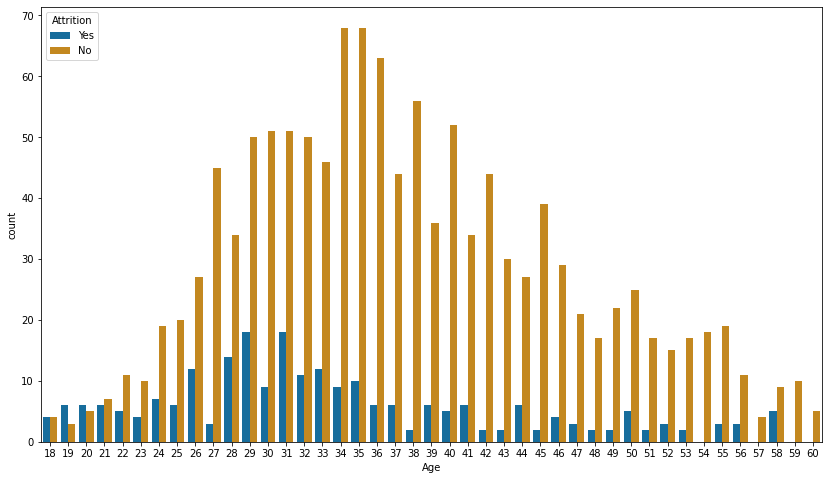

In [12]:
#Show the employee attrition by age
plt.figure(figsize=(14, 8))
sns.countplot(x='Age', hue='Attrition', data=df, palette='colorblind')

In [13]:
#Print all the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : '+ str(df[column].unique()))
        print()
        print(df[column].value_counts())
        print('__________________________________________________________________________________')
        print()

Attrition : ['Yes' 'No']

No     1233
Yes     237
Name: Attrition, dtype: int64
__________________________________________________________________________________

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
__________________________________________________________________________________

Department : ['Sales' 'Research & Development' 'Human Resources']

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
__________________________________________________________________________________

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_______________

In [14]:
#Remove some useless columns
df = df.drop('Over18', axis=1)
df = df.drop('EmployeeNumber', axis=1)
df = df.drop('StandardHours', axis=1)
df = df.drop('EmployeeCount', axis=1)

In [15]:
#Get the correlation
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


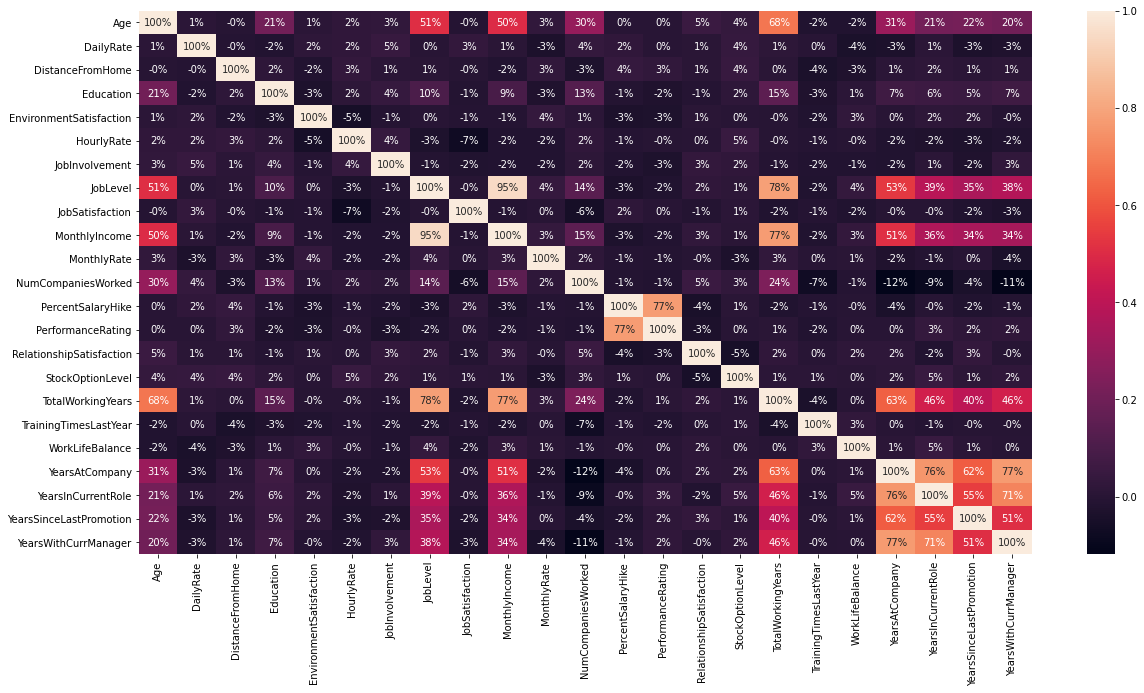

In [16]:
#Visualize the correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [17]:
#Transform non numerical to numerical
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    else:
        df[column] = LabelEncoder().fit_transform(df[column])

In [18]:
#Bring attrition column in the first Position
cols = list(df.columns.values)
#cols
df = df[['Attrition',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

In [19]:
#Split the data
X = df.iloc[:, 1:df.shape[1]]
Y = df.iloc[:, 0]

In [20]:
#Split the data ( 75% training and 25% testing )
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [21]:
#Find the best n_estimator for Random Forest
'''forest = RandomForestClassifier(criterion='entropy', random_state=0)
estimators = np.arange(10, 500, 10)
scores = []
for n in estimators:
    forest.set_params(n_estimators=n)
    forest.fit(X_train, Y_train)
    scores.append(forest.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)'''

'forest = RandomForestClassifier(criterion=\'entropy\', random_state=0)\nestimators = np.arange(10, 500, 10)\nscores = []\nfor n in estimators:\n    forest.set_params(n_estimators=n)\n    forest.fit(X_train, Y_train)\n    scores.append(forest.score(X_test, Y_test))\nplt.title("Effect of n_estimators")\nplt.xlabel("n_estimator")\nplt.ylabel("score")\nplt.plot(estimators, scores)'

In [22]:
#Find the best combination of learning rate and n_estimators for Gradient Boosting Trees or AdaBoost
'''forest = AdaBoostClassifier(random_state=0, algorithm='SAMME') #Put GBT or Adabboost model
estimators = np.arange(10, 200, 10) #Tune the values to your liking # n_estimators
lear_rate = np.arange(0.1, 2, 0.1) #Tune the values to your liking # learning rate
scores = []
estimator = []
learning_rate = []
for n in estimators:
    for r in lear_rate:
        forest.set_params(n_estimators=n, learning_rate=r)
        forest.fit(X_train, Y_train)
        scores.append(forest.score(X_test, Y_test))
        learning_rate.append(r)
        estimator.append(n)'''

"forest = AdaBoostClassifier(random_state=0, algorithm='SAMME') #Put GBT or Adabboost model\nestimators = np.arange(10, 200, 10) #Tune the values to your liking # n_estimators\nlear_rate = np.arange(0.1, 2, 0.1) #Tune the values to your liking # learning rate\nscores = []\nestimator = []\nlearning_rate = []\nfor n in estimators:\n    for r in lear_rate:\n        forest.set_params(n_estimators=n, learning_rate=r)\n        forest.fit(X_train, Y_train)\n        scores.append(forest.score(X_test, Y_test))\n        learning_rate.append(r)\n        estimator.append(n)"

In [23]:
#Show the scores
'''score = pd.DataFrame({'Score': scores, 'Learning rate': learning_rate, 'N estimator': estimator})
score.sort_values(by=['Score'], inplace=True, ascending=False)
print(score)'''

"score = pd.DataFrame({'Score': scores, 'Learning rate': learning_rate, 'N estimator': estimator})\nscore.sort_values(by=['Score'], inplace=True, ascending=False)\nprint(score)"

In [24]:
#Use the random forest classifier
#forest = RandomForestClassifier(n_estimators=180, criterion='entropy', random_state=0)
#forest.fit(X_train, Y_train)

In [ ]:
#Lets find out the best params setup for a balanced model
'''#base_estimator_criterion = ['gini', 'entropy']
#base_estimator_splitter = ['random', 'best']
#scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
n_estimators_range = list(range(10, 200, 10))
learning_rate_range = np.arange(0.1, 2, 0.1)
#algorithm_options = ['SAMME', 'SAMME.R']
loss_options = ['deviance', 'exponential']
max_depth_range = list(range(2, 10, 1))

#DTC = DecisionTreeClassifier(random_state = 0, max_features = "auto", max_depth = None)
#ABC = AdaBoostClassifier(random_state=0)
GTB = GradientBoostingClassifier(random_state=0)

param_grid = dict(n_estimators=n_estimators_range, learning_rate=learning_rate_range, loss=loss_options, max_depth=max_depth_range)

grid = GridSearchCV(GTB, param_grid, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, Y_train)'''

In [ ]:
results = grid.cv_results_
prediction = pd.DataFrame(results)
print(prediction)

In [147]:
'''print('The best params are: {}'.format(grid.best_params_))
print()
print('The best score is: {}'.format(grid.best_score_))
print()
print('The mean cross-validated score is: {}'.format(grid.score(X_test, Y_test)))'''

The best params are: {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 110}

The best score is: 0.8217081864473169

The mean cross-validated score is: 0.8075083426028922


In [136]:
#Use AdaBoost
forest = AdaBoostClassifier(n_estimators=130, learning_rate=1.3, random_state=0, algorithm='SAMME')
forest.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.3,
                   n_estimators=130, random_state=0)

In [149]:
#Use Gradient tree boost
#forest = GradientBoostingClassifier(n_estimators=110, learning_rate=0.2, max_depth=2, loss='deviance', random_state=0)
#forest.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=110,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [150]:
#Get the accuracy on the training data set
round(forest.score(X_train, Y_train), 3)

0.946

In [151]:
Untitled#Show the classification report
prediction = forest.predict(X_test)
target_names = ['TP + FP', 'TN + FN']
print(classification_report(Y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

     TP + FP       0.88      0.97      0.92       310
     TN + FN       0.67      0.31      0.42        58

    accuracy                           0.87       368
   macro avg       0.77      0.64      0.67       368
weighted avg       0.85      0.87      0.85       368



In [152]:
#Show the confusion matrix and accuracy score for the model on the test data
cm = confusion_matrix(Y_test, forest.predict(X_test))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
print()
print(cm)
print()
print('True positive is: {}'.format(TP))
print('False positive is: {}'.format(FP))
print('False negative is: {}'.format(FN))
print('True negative is: {}'.format(TN))


[[301   9]
 [ 40  18]]

True positive is: 301
False positive is: 9
False negative is: 40
True negative is: 18


In [153]:
print('Model beeing correct guessing only no = {}'.format(no_guessing))
print('Model Testing Accuracy = {}'.format(round(forest.score(X_test, Y_test), 3)))

Model beeing correct guessing only no = 0.808
Model Testing Accuracy = 0.867


In [154]:
#Show the prediction score ( The ability of the model not to predict attrit for the employees that actually wont attrit)
round(precision_score(Y_test, prediction), 3)

0.667

In [155]:
#Show the recall score (What percentage of employees that end up attriting does the model succesfully find )
round(recall_score(Y_test, prediction), 3)

0.31

In [156]:
#Show the f1 score
round(f1_score(Y_test, prediction), 3)

0.424

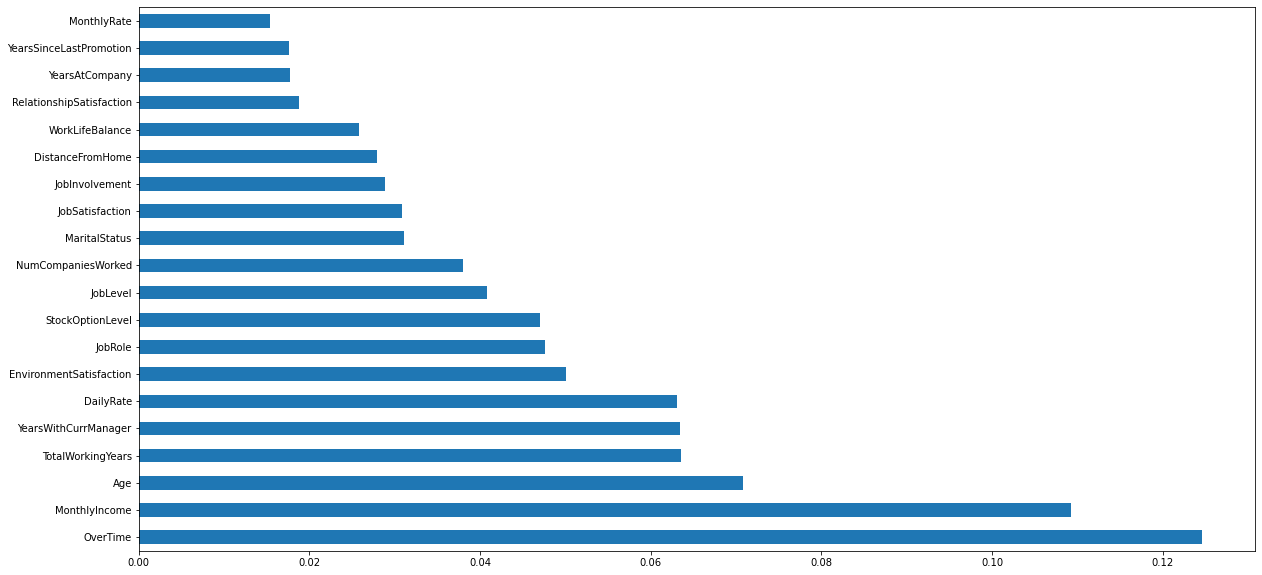

In [157]:
#Inspect which feature contributes more to attrition
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
plt.figure(figsize=(20, 10))
feat_importances.nlargest(20).plot(kind='barh')

In [33]:
#As we see from the above plot the 2 variables that contribute more is 1: Monthly income, 2: Total working years